In [1]:
# Import Dependencies and Setup
import pandas as pd
import numpy as np
from pathlib import Path

# Store filepaths into variables
results_cleaned_to_load = Path("results_cleaned.csv")
athletes_cleaned_to_load = Path("cleaned_olympic_athletes.csv")

# Read Results and Athletes Data Files and store into Pandas DataFrames
results_data = pd.read_csv(results_cleaned_to_load)
athletes_data = pd.read_csv(athletes_cleaned_to_load) 

# Combine the data into a single dataset 
complete_dataset = pd.merge(results_data, athletes_data, how="left", on=["athlete_url"])
complete_dataset.head(30) 

/var/folders/pb/ks3fck357d19szchn30pmn2m0000gn/T/ipykernel_50707/2462207859.py:11: DtypeWarning: Columns (14,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  results_data = pd.read_csv(results_cleaned_to_load)


,discipline_title,event_title,slug_game,participant_type,medal_type,rank_equal,rank_position,country_name,country_3_letter_code,athlete_url,...,athlete2_last_name,athlete2_url,first_name_y,last_name_y,games_participations,gold_medals,silver_medals,bronze_medals,first_olympics,athlete_YOB
0,Freestyle Skiing,Men's Moguls,beijing-2022,Athlete,NaN,False,6,Australia,AUS,https://olympics.com/en/athletes/cooper-woods-...,...,NaN,NaN,Cooper,Woods-Topalovic,1.0,0.0,0.0,0.0,beijing-2022,2000.0
1,Freestyle Skiing,Men's Moguls,beijing-2022,Athlete,NaN,False,17,Sweden,SWE,https://olympics.com/en/athletes/elofsson,...,NaN,NaN,Felix,Elofsson,2.0,0.0,0.0,0.0,pyeongchang-2018,1995.0
2,Freestyle Skiing,Men's Moguls,beijing-2022,Athlete,NaN,False,16,United States of America,USA,https://olympics.com/en/athletes/dylan-walczyk,...,NaN,NaN,Dylan,Walczyk,1.0,0.0,0.0,0.0,beijing-2022,1993.0
3,Freestyle Skiing,Men's Moguls,beijing-2022,Athlete,NaN,False,19,Finland,FIN,https://olympics.com/en/athletes/olli-penttala,...,NaN,NaN,Olli,Penttala,1.0,0.0,0.0,0.0,beijing-2022,1995.0
4,Freestyle Skiing,Men's Moguls,beijing-2022,Athlete,NaN,False,8,Kazakhstan,KAZ,https://olympics.com/en/athletes/reikherd,...,NaN,NaN,Dmitriy,Reikherd,1.0,0.0,0.0,0.0,beijing-2022,1989.0
5,Freestyle Skiing,Men's Moguls,beijing-2022,Athlete,NaN,False,29,Australia,AUS,https://olympics.com/en/athletes/matt-graham,...,NaN,NaN,Matt,Graham,3.0,0.0,1.0,0.0,sochi-2014,1994.0
6,Freestyle Skiing,Men's Moguls,beijing-2022,Athlete,BRONZE,False,3,Japan,JPN,https://olympics.com/en/athletes/ikuma-horishima,...,NaN,NaN,Ikuma,Horishima,2.0,0.0,0.0,1.0,pyeongchang-2018,1997.0
7,Freestyle Skiing,Men's Moguls,beijing-2022,Athlete,NaN,False,7,Japan,JPN,https://olympics.com/en/athletes/daichi-hara,...,NaN,NaN,Daichi,Hara,2.0,0.0,0.0,1.0,pyeongchang-2018,1997.0
8,Freestyle Skiing,Men's Moguls,beijing-2022,Athlete,NaN,False,26,Canada,CAN,https://olympics.com/en/athletes/laurent-dumais,...,NaN,NaN,Laurent,Dumais,1.0,0.0,0.0,0.0,beijing-2022,1996.0
9,Freestyle Skiing,Men's Moguls,beijing-2022,Athlete,NaN,False,24,Australia,AUS,https://olympics.com/en/athletes/james-matheson,...,NaN,NaN,James,Matheson,2.0,0.0,0.0,0.0,pyeongchang-2018,1995.0


In [2]:
# Show all headers in the new DataFrame
headers = complete_dataset.columns.tolist()
headers

['discipline_title',
 'event_title',
 'slug_game',
 'participant_type',
 'medal_type',
 'rank_equal',
 'rank_position',
 'country_name',
 'country_3_letter_code',
 'athlete_url',
 'value_unit',
 'value_type',
 'first_name_x',
 'last_name_x',
 'athlete1_first_name',
 'athlete1_last_name',
 'athlete1_url',
 'athlete2_first_name',
 'athlete2_last_name',
 'athlete2_url',
 'first_name_y',
 'last_name_y',
 'games_participations',
 'gold_medals',
 'silver_medals',
 'bronze_medals',
 'first_olympics',
 'athlete_YOB']

In [3]:
# Count how many total athletes are in this csv 
unique_athletes_count = len(complete_dataset[['athlete_url', 'athlete1_url', 'athlete2_url']].stack().unique())
unique_athletes_count

75930

In [4]:
# Concatenate URLs from athlete_url, athlete1_url, and athlete2_url columns
urls = complete_dataset[['athlete_url', 'athlete1_url', 'athlete2_url']].stack().reset_index(drop=True)

# Remove duplicates
unique_urls = urls.drop_duplicates()

# Create a new column in the DataFrame and assign the unique URLs to it
complete_dataset['unique_urls'] = unique_urls

# Print the DataFrame to verify the changes
complete_dataset.head()


,discipline_title,event_title,slug_game,participant_type,medal_type,rank_equal,rank_position,country_name,country_3_letter_code,athlete_url,...,athlete2_url,first_name_y,last_name_y,games_participations,gold_medals,silver_medals,bronze_medals,first_olympics,athlete_YOB,unique_urls
0,Freestyle Skiing,Men's Moguls,beijing-2022,Athlete,NaN,False,6,Australia,AUS,https://olympics.com/en/athletes/cooper-woods-...,...,NaN,Cooper,Woods-Topalovic,1.0,0.0,0.0,0.0,beijing-2022,2000.0,https://olympics.com/en/athletes/cooper-woods-...
1,Freestyle Skiing,Men's Moguls,beijing-2022,Athlete,NaN,False,17,Sweden,SWE,https://olympics.com/en/athletes/elofsson,...,NaN,Felix,Elofsson,2.0,0.0,0.0,0.0,pyeongchang-2018,1995.0,https://olympics.com/en/athletes/elofsson
2,Freestyle Skiing,Men's Moguls,beijing-2022,Athlete,NaN,False,16,United States of America,USA,https://olympics.com/en/athletes/dylan-walczyk,...,NaN,Dylan,Walczyk,1.0,0.0,0.0,0.0,beijing-2022,1993.0,https://olympics.com/en/athletes/dylan-walczyk
3,Freestyle Skiing,Men's Moguls,beijing-2022,Athlete,NaN,False,19,Finland,FIN,https://olympics.com/en/athletes/olli-penttala,...,NaN,Olli,Penttala,1.0,0.0,0.0,0.0,beijing-2022,1995.0,https://olympics.com/en/athletes/olli-penttala
4,Freestyle Skiing,Men's Moguls,beijing-2022,Athlete,NaN,False,8,Kazakhstan,KAZ,https://olympics.com/en/athletes/reikherd,...,NaN,Dmitriy,Reikherd,1.0,0.0,0.0,0.0,beijing-2022,1989.0,https://olympics.com/en/athletes/reikherd


In [5]:
# Count the number of unique URLs in the 'unique_urls' column
unique_urls_count = complete_dataset['unique_urls'].nunique()
unique_urls_count

75930

In [6]:
# Initialize a set to store unique combinations of first and last names
unique_names_set = set()

# Iterate through rows and add unique combinations to the set
for row in complete_dataset.itertuples(index=False):
    unique_names_set.add((row.first_name_x, row.last_name_x))
    unique_names_set.add((row.first_name_y, row.last_name_y))

# Convert the set to a list of tuples
full_names = list(unique_names_set)

# Convert the list of tuples to a DataFrame
unique_names_df = pd.DataFrame(full_names, columns=['first_name', 'last_name'])

# Print the DataFrame to verify the changes
unique_names_df.head()


,first_name,last_name
0,Ju,Lin
1,Ilias,Malamas
2,Marleen,Veldhuis
3,Donald,Thomas
4,Eun-ju,Ha


In [7]:
# Drop the row containing 'Cooper' and 'Woods-topalovic'
unique_names_df.drop(unique_names_df[(unique_names_df['first_name'] == 'Cooper') & (unique_names_df['last_name'] == 'Woods-topalovic')].index, inplace=True)

# Reset index
unique_names_df.reset_index(drop=True, inplace=True)

# Print the updated unique_names_df
unique_names_df.head()


,first_name,last_name
0,Ju,Lin
1,Ilias,Malamas
2,Marleen,Veldhuis
3,Donald,Thomas
4,Eun-ju,Ha


In [8]:
# Count the number of unique URLs in the 'unique_urls' column
unique_names_df = unique_names_df['first_name'].nunique()
unique_names_df

20203

In [9]:
# Drop the specified columns
complete_dataset.drop(['athlete2_last_name','athlete2_first_name','athlete1_last_name','athlete1_first_name','first_olympics','last_name_y','first_name_y','last_name_x','first_name_x','value_type','value_unit','rank_position','rank_equal','athlete_url', 'athlete1_url', 'athlete2_url'], axis=1, inplace=True)
complete_dataset.head()

,discipline_title,event_title,slug_game,participant_type,medal_type,country_name,country_3_letter_code,games_participations,gold_medals,silver_medals,bronze_medals,athlete_YOB,unique_urls
0,Freestyle Skiing,Men's Moguls,beijing-2022,Athlete,NaN,Australia,AUS,1.0,0.0,0.0,0.0,2000.0,https://olympics.com/en/athletes/cooper-woods-...
1,Freestyle Skiing,Men's Moguls,beijing-2022,Athlete,NaN,Sweden,SWE,2.0,0.0,0.0,0.0,1995.0,https://olympics.com/en/athletes/elofsson
2,Freestyle Skiing,Men's Moguls,beijing-2022,Athlete,NaN,United States of America,USA,1.0,0.0,0.0,0.0,1993.0,https://olympics.com/en/athletes/dylan-walczyk
3,Freestyle Skiing,Men's Moguls,beijing-2022,Athlete,NaN,Finland,FIN,1.0,0.0,0.0,0.0,1995.0,https://olympics.com/en/athletes/olli-penttala
4,Freestyle Skiing,Men's Moguls,beijing-2022,Athlete,NaN,Kazakhstan,KAZ,1.0,0.0,0.0,0.0,1989.0,https://olympics.com/en/athletes/reikherd


In [10]:
# Rename the column
complete_dataset.rename(columns={'unique_urls': 'athlete_url'}, inplace=True)
complete_dataset.head()

,discipline_title,event_title,slug_game,participant_type,medal_type,country_name,country_3_letter_code,games_participations,gold_medals,silver_medals,bronze_medals,athlete_YOB,athlete_url
0,Freestyle Skiing,Men's Moguls,beijing-2022,Athlete,NaN,Australia,AUS,1.0,0.0,0.0,0.0,2000.0,https://olympics.com/en/athletes/cooper-woods-...
1,Freestyle Skiing,Men's Moguls,beijing-2022,Athlete,NaN,Sweden,SWE,2.0,0.0,0.0,0.0,1995.0,https://olympics.com/en/athletes/elofsson
2,Freestyle Skiing,Men's Moguls,beijing-2022,Athlete,NaN,United States of America,USA,1.0,0.0,0.0,0.0,1993.0,https://olympics.com/en/athletes/dylan-walczyk
3,Freestyle Skiing,Men's Moguls,beijing-2022,Athlete,NaN,Finland,FIN,1.0,0.0,0.0,0.0,1995.0,https://olympics.com/en/athletes/olli-penttala
4,Freestyle Skiing,Men's Moguls,beijing-2022,Athlete,NaN,Kazakhstan,KAZ,1.0,0.0,0.0,0.0,1989.0,https://olympics.com/en/athletes/reikherd


In [11]:
# Count the number of unique URLs in the 'unique_urls' column
complete_dataset_count = complete_dataset['athlete_url'].nunique()
complete_dataset_count

75930

In [12]:
complete_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162804 entries, 0 to 162803
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   discipline_title       162804 non-null  object 
 1   event_title            162804 non-null  object 
 2   slug_game              162804 non-null  object 
 3   participant_type       162804 non-null  object 
 4   medal_type             20206 non-null   object 
 5   country_name           162804 non-null  object 
 6   country_3_letter_code  162804 non-null  object 
 7   games_participations   129932 non-null  float64
 8   gold_medals            129932 non-null  float64
 9   silver_medals          129932 non-null  float64
 10  bronze_medals          129932 non-null  float64
 11  athlete_YOB            129932 non-null  float64
 12  athlete_url            75930 non-null   object 
dtypes: float64(5), object(8)
memory usage: 16.1+ MB


In [13]:
# Check for null values in the 'athlete_url' column
null_values_before = complete_dataset['athlete_url'].isnull().sum()
print("Total null values before replacement:", null_values_before)

# Generate unique identifiers for null values
unique_identifiers = ["unique_" + str(i) for i in range(1, null_values_before + 1)]

# Replace null values in 'athlete_url' column with unique identifiers
complete_dataset.loc[complete_dataset['athlete_url'].isnull(), 'athlete_url'] = unique_identifiers

# Check for null values in the 'athlete_url' column after replacement
null_values_after = complete_dataset['athlete_url'].isnull().sum()
print("Total null values after replacement:", null_values_after)

if null_values_after > 0:
    print("There are still null values in the 'athlete_url' column.")
else:
    print("All null values in the 'athlete_url' column have been successfully replaced.")

Total null values before replacement: 86874
Total null values after replacement: 0
All null values in the 'athlete_url' column have been successfully replaced.


In [14]:
# Make a copy of complete_dataset to ensure it doesn't affect the original DataFrame
filtered_dataset = complete_dataset.copy()

# Check for null values in the 'athlete_url' column in complete_dataset
null_values_complete = complete_dataset['athlete_url'].isnull().sum()
print("Total null values in complete_dataset:", null_values_complete)

# Generate unique identifiers for null values in complete_dataset
unique_identifiers = ["unique_" + str(i) for i in range(1, null_values_complete + 1)]

# Replace null values in 'athlete_url' column in complete_dataset with unique identifiers
complete_dataset.loc[complete_dataset['athlete_url'].isnull(), 'athlete_url'] = unique_identifiers

# Check for null values in the 'athlete_url' column in filtered_dataset before update
null_values_filtered_before = filtered_dataset['athlete_url'].isnull().sum()
print("Total null values in filtered_dataset before:", null_values_filtered_before)

# Update filtered_dataset to reflect the changes made in complete_dataset
filtered_dataset['athlete_url'] = complete_dataset['athlete_url']

# Check for null values in the 'athlete_url' column in filtered_dataset after update
null_values_filtered_after = filtered_dataset['athlete_url'].isnull().sum()
print("Total null values in filtered_dataset after:", null_values_filtered_after)

if null_values_filtered_after > 0:
    print("There are still null values in the 'athlete_url' column of filtered_dataset.")
else:
    print("All null values in the 'athlete_url' column of filtered_dataset have been successfully replaced.")


Total null values in complete_dataset: 0
Total null values in filtered_dataset before: 0
Total null values in filtered_dataset after: 0
All null values in the 'athlete_url' column of filtered_dataset have been successfully replaced.


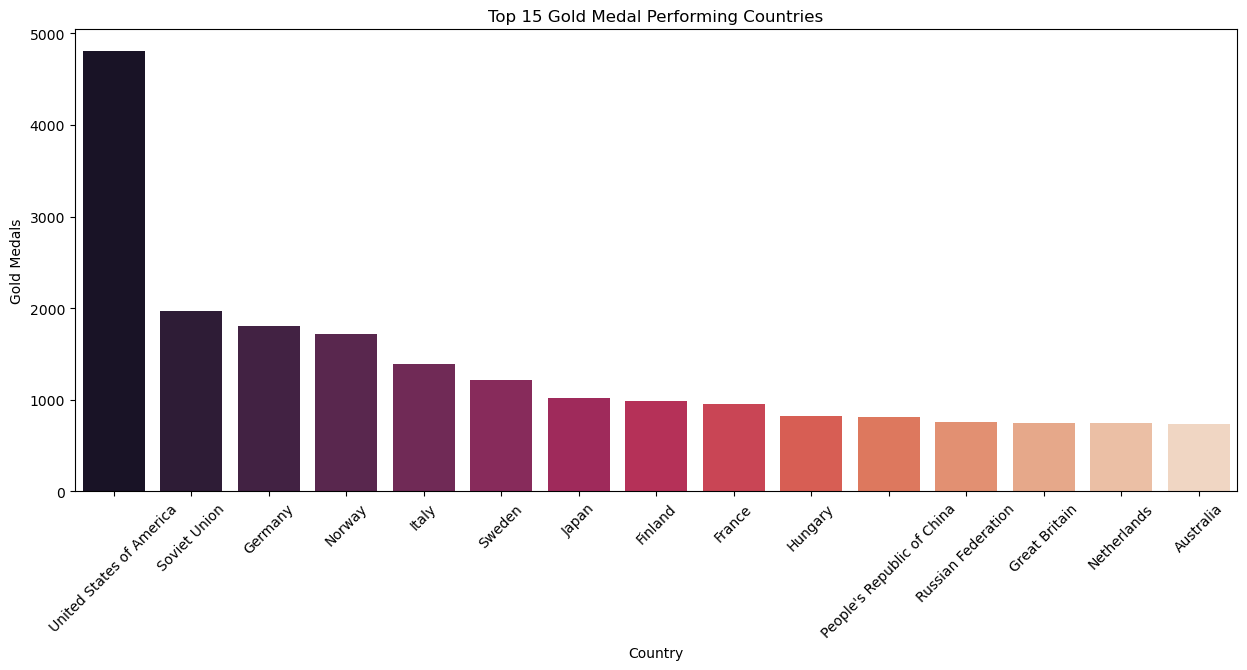

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# complete_dataset[['gold_medals', 
#                  'silver_medals', 
#                  'bronze_medals']] = complete_dataset[['gold_medals', 
#                                                       'silver_medals', 
#                                                       'bronze_medals']].astype(int)
# complete_dataset.head(10)

# Group gold medals by country
grouped_data = complete_dataset.groupby('country_name')['gold_medals'].sum().reset_index()

# Sort the data by gold medal count in descending order
grouped_data = grouped_data.sort_values(by='gold_medals', ascending=False)

# Select the top 10 performing countries
top_10_countries = grouped_data.head(15)

# Create seaborn chart
plt.figure(figsize=(15, 6))
sns.barplot(data=top_10_countries, x='country_name', y='gold_medals', palette='rocket')
plt.title('Top 15 Gold Medal Performing Countries')
plt.xlabel('Country')
plt.ylabel('Gold Medals')
plt.xticks(rotation=45)
plt.show()

In [15]:
complete_dataset.to_csv('clean_combined.csv', index=False)